1. Import Required Libraries
2. Load the Dataset
3. Initial Data Inspection
4. Check for Missing Values
5. Check for Outliers
6. Check Feature Correlation
7. Select Features and Target
8. Feature Scaling
9. Split the Dataset
10. Train the Model
11. Predict on Test Data
12. Evaluate the Model
13. Visualize Predictions


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

2. Load the Dataset


In [2]:
df = pd.read_csv("/content/drive/MyDrive/datasets/placement.csv")

3. Initial Data Inspection


In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.shape

(200, 2)

In [7]:
# Statisstics measures of the dataset
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


Text(0, 0.5, 'package(in lpa)')

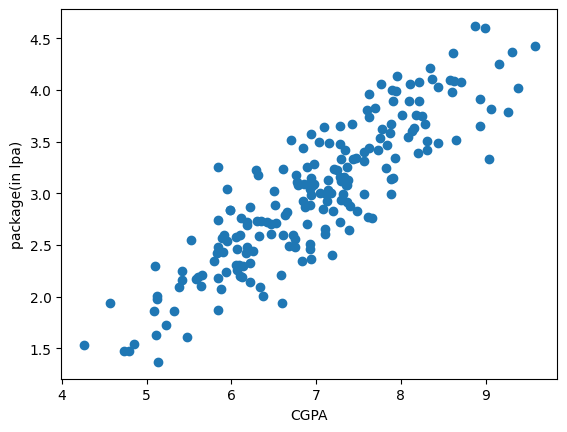

In [8]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

4. Check for Missing Values


In [9]:
#Checking for missing values
df.isnull().sum()

,0
cgpa,0
package,0


5. Check for Outliers


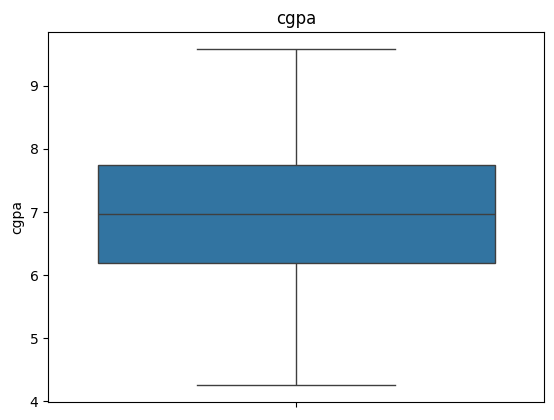

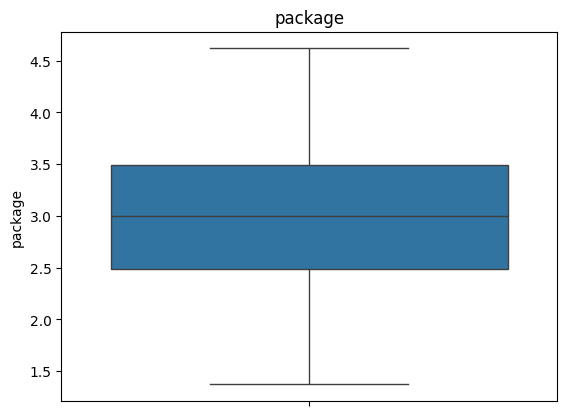

In [10]:
# Boxplot for each feature
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(data=df[column])
    plt.title(column)
    plt.show()


In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


6. Check Feature Correlation

Understanding the correlation between various features in a dataset.

1.Positive correlation

2.Negative Correlation

In [12]:
correlation = df.corr()

<Axes: >

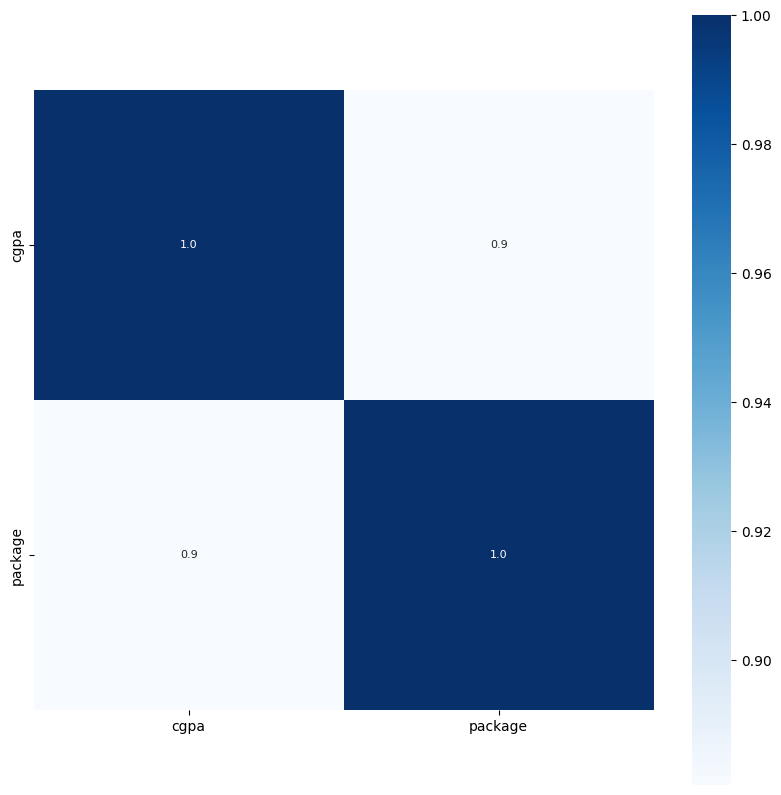

In [13]:
# Constructing the heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot = True,annot_kws={"size":8},cmap="Blues")

7. Select Features and Target


In [14]:
X = df.drop('package', axis=1)
y = df['package']

8. Feature Scaling


In [15]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

9. Split the Dataset


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

Initializing the LinearRegression Class Instance

In [18]:
lr = LinearRegression()

10. Train the Model


In [19]:
lr.fit(X_train,y_train)

LinearRegression()

11. Predict on Test Data

In [20]:
y_pred = lr.predict(X_test)

In [22]:
m = lr.coef_
m

array([0.57425647])

In [23]:
b = lr.intercept_
b

np.float64(-1.0270069374542108)

In [24]:
# y = mx+b
y = m * 6.63 + b
y

array([2.78031348])

12. Evaluate the Model

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

score_1 = r2_score(y_test,y_pred)
print("R2 score:",score_1)

score_2 = mean_absolute_error(y_test,y_pred)
print("MAE:",score_2)

R2 score: 0.7730984312051673
MAE: 0.23150985393278373


13. Visualize Predictions

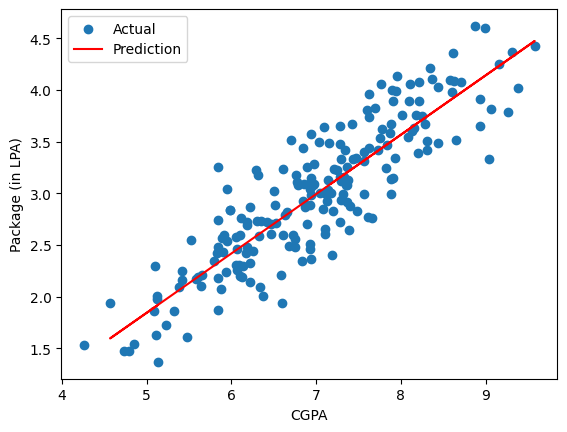

In [27]:
plt.scatter(df['cgpa'], df['package'], label='Actual')
plt.plot(X_train, lr.predict(X_train), color='red', label='Prediction')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.legend()
plt.show()
